## 4 nodes

In [1]:
%run ../imports.py

In [2]:
G = nx.DiGraph()

In [3]:
G.add_nodes_from([0,1,2,3,4,5])
G.add_edges_from([
    (0,1),
    (0,2),
    (3,2),
    (2,4),
    (5,3)
])

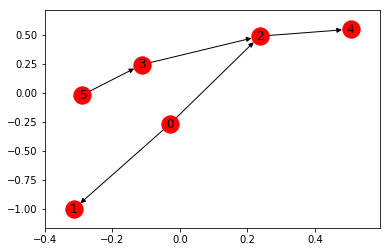

In [4]:
nx.draw_networkx(G)

In [5]:
L = out_degree_laplacian(G)
np.linalg.matrix_rank(L)

4

In [6]:
Q = orth_matrix(L).T
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [7]:
Q

matrix([[ 0.7208, -0.3604, -0.5683,  0.1292,  0.1019, -0.0232],
        [ 0.3651, -0.1826,  0.3651, -0.7303, -0.1826,  0.3651],
        [-0.3079,  0.154 , -0.4855, -0.3637,  0.5735,  0.4297],
        [ 0.1195, -0.0597,  0.2643, -0.2821,  0.6239, -0.6659]])

In [8]:
sigma

array([[ 0.2406,  0.0096, -0.0077, -0.1278],
       [ 0.0096,  0.3204,  0.0112, -0.0706],
       [-0.0077,  0.0112,  0.5319,  0.0596],
       [-0.1278, -0.0706,  0.0596,  1.6902]])

In [9]:
eqL

matrix([[ 1.4529e+00, -7.2646e-01, -4.8430e-01, -1.6143e-01, -1.0559e-15,
         -8.0717e-02],
        [-7.2646e-01,  3.6323e-01,  2.4215e-01,  8.0717e-02,  5.8878e-16,
          4.0359e-02],
        [-4.8430e-01,  2.4215e-01,  1.1614e+00, -4.4619e-01, -5.0000e-01,
          2.6906e-02],
        [-1.6143e-01,  8.0717e-02, -4.4619e-01,  1.0179e+00, -6.5704e-16,
         -4.9103e-01],
        [-3.9050e-15,  2.1743e-15, -5.0000e-01,  5.8728e-15,  5.0000e-01,
         -2.1490e-15],
        [-8.0717e-02,  4.0359e-02,  2.6906e-02, -4.9103e-01,  1.4624e-15,
          5.0448e-01]])

In [10]:
posG, negG = separate_graphs(eqL)

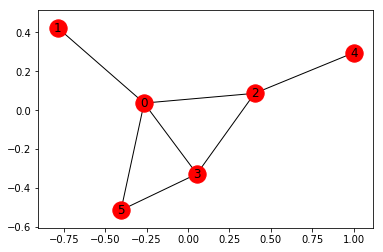

In [12]:
nx.draw_networkx(posG)

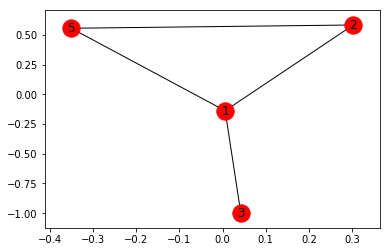

In [13]:
nx.draw_networkx(negG)